# Monte Carlo Simulation - Parameter series

This file implements a simulation for a series of parameter values, for various specified DGP's. 

A number of dependencies are necessary - particularly the accompanying function files. 

In [1]:
# IMPORT DEPENDENCIES
import numpy as np
import pandas as pd
import os 
import pickle
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import importlib

#Import own files 
import sys 
sys.path.append(r'F:\Documents\TheEnd\Code\Functions')
sys.path.append(r'C:\Users\rbjoe\Dropbox\Kugejl\10.semester\TheEnd\Code\Functions')
import monte_carlo_simulation as mc
import dgp_stuff as dgp
import neural_net as nn
import estimators as est
import summaries as smr
import figurez as figz
import tablez as tblz


###############################################################################
# Load parameters (defined in simulation file)
parameters, estimators, g_functions, changing_parameter = \
        mc.MC_load_pars('6_2_v3_reg_prod_2018_07_21') 


#changing_parameter['parameter_space'] = [n for n in range(int(2.5*10**2), 10**3+1, int(2.5*10**2))] +\
#                                        [n for n in range(int(2.5*10**3), 10**4+1, int(2.5*10**3))] +\
#                                        [n for n in range(int(2.5*10**4), 10**5, int(2.5*10**4))] #+\
                                        #[n for n in range(int(2.5*10**5), 10**6+1, int(2.5*10**5))]
parameters

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


{'B': 0,
 'C': 2,
 'M': 100,
 'V': 0,
 'Z': 1,
 'beta_distribution': <function dgp_stuff.draw_beta_normal>,
 'beta_mean': 1,
 'beta_scale': 1,
 'decimals': 2,
 'filename': '6_2_v3_reg_prod_2018_07_21',
 'k': 1,
 'parallel': True,
 'redraw': False,
 'reduce_size': True,
 'run_observables': True,
 'run_wellspecified': False,
 'save_file': False,
 'seed': 12661,
 'start_time': datetime.datetime(2018, 7, 21, 18, 45, 33, 948911),
 'u_distribution': <function dgp_stuff.draw_u_normal>,
 'u_scale': 2,
 'x_distribution': <function dgp_stuff.draw_x_normal_iv_v2>,
 'x_distribution_parameters': <function dgp_stuff.gen_x_normal_unitvariance_randommean_iv>,
 'x_mean': 0,
 'y_generate': <function dgp_stuff.gen_y_reg>,
 'y_squashing': <function dgp_stuff.linear_output>,
 'y_squashing_prime': <function dgp_stuff.linear_output_prime>}

In [2]:
subset1 = list(g_functions.keys())[0:2]
models1 = ['DGP']+list(estimators.keys()) 
#models1 = ['DGP', 'NN (I)', '2SNN'] #['DGP']+list(set(estimators.keys())-set(['2SLS']))
subset2 = list(g_functions.keys())[2:4]
#models2 = ['DGP']+list(estimators.keys())
models2 = models1
comp_kws = {'coefficient':0}
mrgeff_file = 'res_mrgeffs'
figtitle = '6_2_v3_reg_'

### Mean ME (bias) for marginal effects

In [3]:
#Calculate MME for marginal effects 
importlib.reload(smr)
res_me = smr.comp_wrapper_parseries_g(smr.comp_me, mrgeff_file, 
                                       dgp_series = mrgeff_file,
                                       g_functions=g_functions, 
                                       comp_kws = comp_kws, #Look at one beta.
                                       filename =  parameters['filename'], 
                                       parameter_space = changing_parameter['parameter_space'])

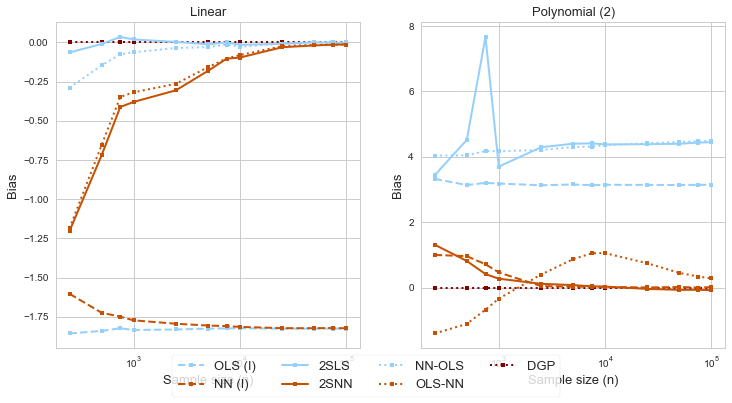

In [4]:
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_me, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_ME_1',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   legend = 'figure', DGP_last=True,
                   xlabel = 'Sample size (n)', ylabel= 'Bias', 
                   #ymin = -0.025, ymax = 0.025
                   )

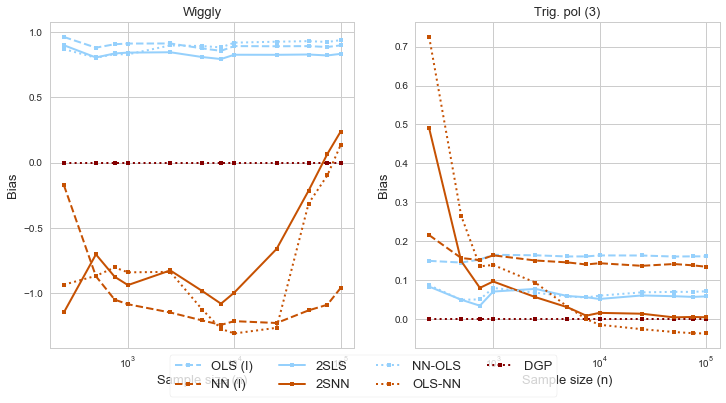

In [5]:
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_me, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_ME_2',
                   legend = 'figure', DGP_last=True,
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'Bias', 
                   #ymin = -0.025, ymax = 0.025
                   )

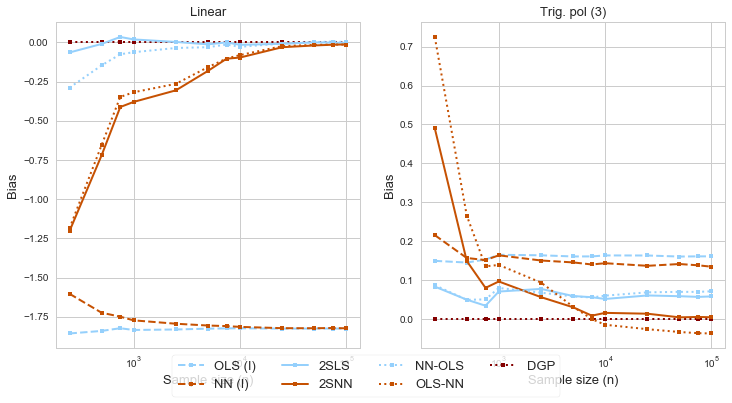

In [6]:
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_me, 
                   g_functions=g_functions, estimators = estimators,
                   subset = [list(g_functions.keys())[i] for i in [0,3]],
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_ME_3',
                   legend = 'figure', DGP_last=True,
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'Bias', 
                   #ymin = -0.025, ymax = 0.025
                   )

### Mean MSE for marginal effects 

In [4]:
#Calculate MMSE
res_mse = smr.comp_wrapper_parseries_g(smr.comp_mse, mrgeff_file, 
                                       dgp_series = mrgeff_file, 
                                       g_functions = g_functions,
                                       comp_kws=comp_kws,
                                       filename =  parameters['filename'],
                                       parameter_space = changing_parameter['parameter_space'])
ylabel = 'MSE'

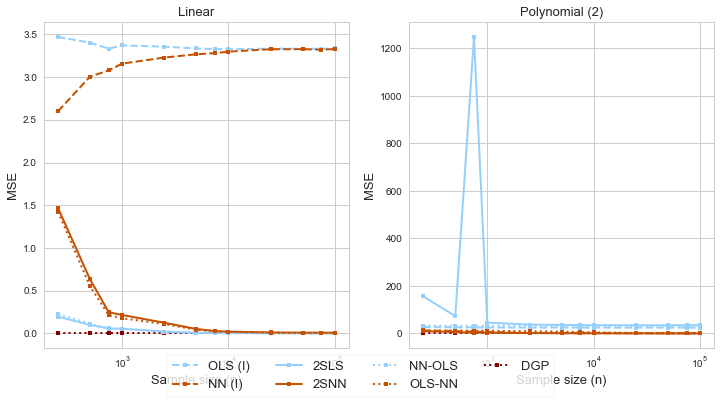

In [8]:
#Show figure 
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_mse, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_MMSE_1',
                   legend = 'figure', DGP_last=True,
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   #ymax = [0.15, 0.75],
                   #ymin = [-0.01,-0.01],
                   xlabel = 'Sample size (n)', ylabel= ylabel, 
                   )

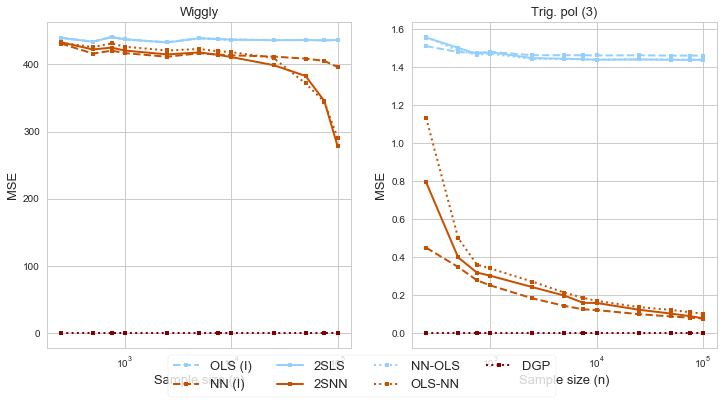

In [9]:
#Show figure 
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_mse, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_MMSE_2',
                   legend = 'figure', DGP_last=True,
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= ylabel, 
                   )

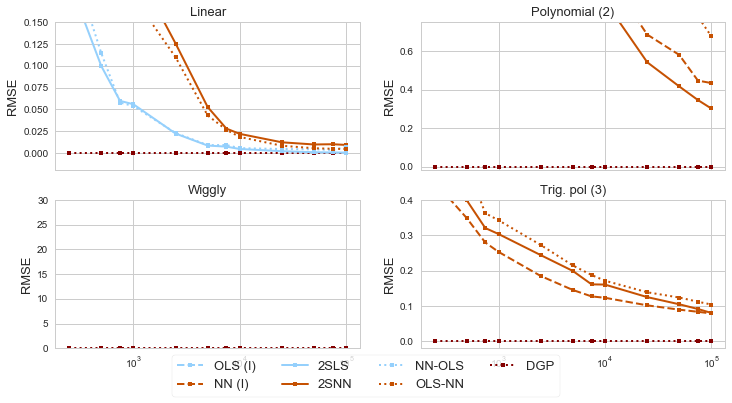

In [16]:
#Show figure 
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_mse, 
                   g_functions=g_functions, estimators = estimators,
                   #subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_MMSE_1_double',
                   legend = 'figure', DGP_last=True,
                   n_rows = 2, n_cols=2, share_y=False, xscale='log',
                   ymax = [0.15, 0.75, 30, 0.4],
                   ymin = [-0.02]*4,
                   xlabel2 = 'Sample size (n)', ylabel= ylabel, 
                   )

### Mean RMSE for marginal effects

In [6]:
#Calculate MRMSE
res_rmse = smr.comp_wrapper_parseries_g(smr.comp_rmse, mrgeff_file, 
                                       dgp_series = mrgeff_file, 
                                       g_functions=g_functions,
                                       comp_kws = comp_kws,
                                       filename =  parameters['filename'], 
                                       parameter_space = changing_parameter['parameter_space'])
ylabel = 'RMSE'

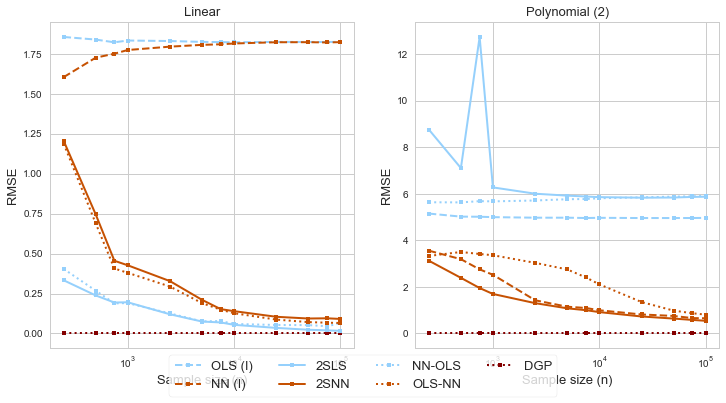

In [12]:
#Show figure 
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_rmse, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_RMSE_1',
                   legend = 'figure', DGP_last=True,
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= ylabel, 
                   )

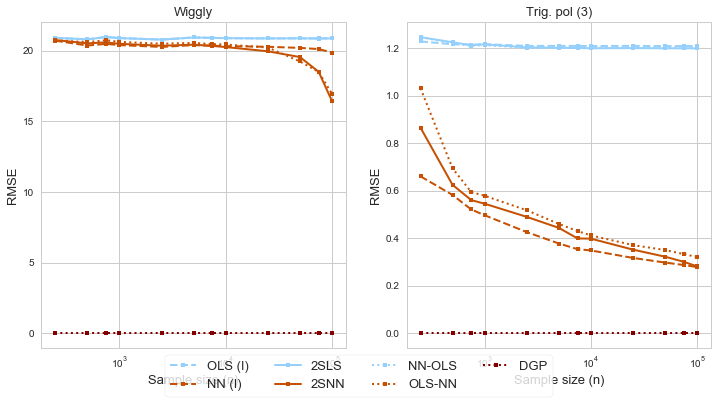

In [13]:
#Show figure 
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_rmse, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_MRMSE_2',
                   legend = 'figure', DGP_last=True,
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= ylabel, 
                   )

### Double figure

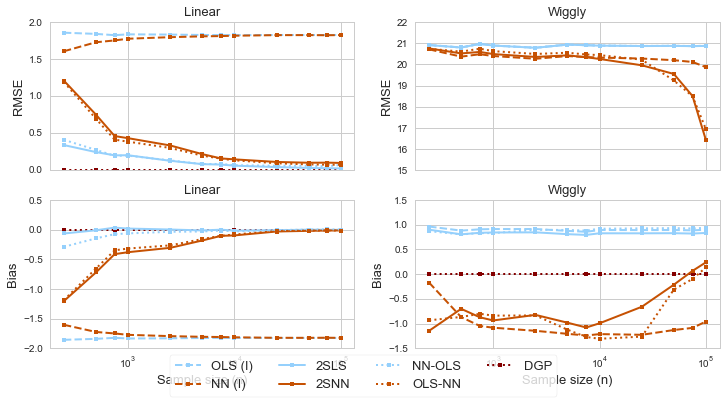

In [9]:
importlib.reload(figz)
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, 
                   g_series = res_rmse, g_series_extra = res_me, 
                   g_functions=g_functions, estimators = estimators,
                   subset = ['Linear', 'Wiggly'], 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_double_',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log', share_x=True,
                   legend = 'figure', DGP_last=True,
                   xlabel2 = 'Sample size (n)', 
                   ylabel = 'RMSE',
                   ylabel2= 'Bias',       
                   ymin = [-0.01, 15,-2,-1.5], 
                   ymax = [2,22,0.5,1.5,]
                   )

### MSE for average marginal effects 


In [ ]:
res_se_avg = smr.comp_wrapper_parseries_g(smr.comp_se_avg, mrgeff_file, 
                                       dgp_series = mrgeff_file,
                                       g_functions=g_functions, 
                                       comp_kws = comp_kws,
                                       filename =  parameters['filename'],
                                       parameter_space = changing_parameter['parameter_space'])
ylabel='SE'

In [ ]:
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_se_avg, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_avg_MSE_1',
                   legend = 'figure', DGP_last=True,
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= ylabel, 
                   )

In [ ]:
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_se_avg, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_avg_MSE_2',
                   legend = 'figure', DGP_last=True,
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= ylabel, 
                   )

### MRSE for average marginal effects 


In [ ]:
res_rse_avg = smr.comp_wrapper_parseries_g(smr.comp_rse_avg, mrgeff_file, 
                                       dgp_series = mrgeff_file, 
                                       g_functions=g_functions,
                                       comp_kws=comp_kws,
                                       filename =  parameters['filename'],
                                       parameter_space = changing_parameter['parameter_space'])


In [ ]:
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_rse_avg, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_avg_MRSE_1',
                   legend = 'figure', DGP_last=True,
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'Mean RMSE for marginal effects', 
                   )

In [ ]:
figz.fig_wrapper_g(g_figfunc = figz.fig_parseries, g_series = res_rse_avg, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_avg_MRSE_2',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   legend = 'figure', DGP_last=True,
                   xlabel = 'Sample size (n)', ylabel= ylabel, 
                   )